In [2]:
import pandas as pd

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kuppu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [5]:
pip install basemap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kuppu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.8 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 324.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.0 MB 980.4 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.0 MB 980.4 kB/s eta 0:00:12
   ---------------------------------------- 0.1/11.0 MB 980.4 kB/s eta 0:00:12
    --------------------------------------- 0.2/11.0 MB 888.4 kB/s eta 0:00:13
    -----------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\kuppu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


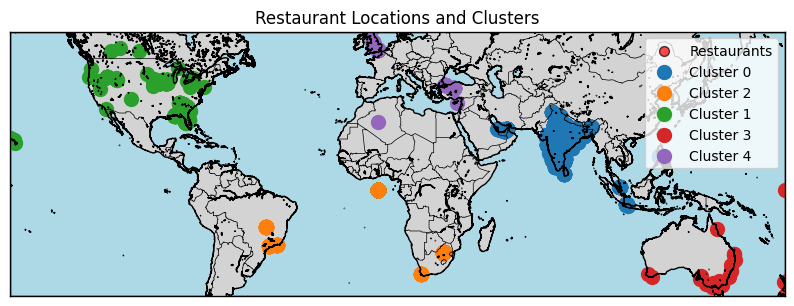

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap

# Load the dataset
file_path = "C:/Users/kuppu/Downloads/Dataset .csv"
data = pd.read_csv(file_path)

# Set up the map for plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Create a Basemap instance (Mercator projection) for the region
m = Basemap(projection='merc', 
            llcrnrlat=min(data['Latitude']) - 0.1, 
            urcrnrlat=max(data['Latitude']) + 0.1,
            llcrnrlon=min(data['Longitude']) - 0.1, 
            urcrnrlon=max(data['Longitude']) + 0.1,
            resolution='i')

# Draw map features
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='lightgray', lake_color='lightblue')

# Convert latitude and longitude to map coordinates
x, y = m(data['Longitude'].values, data['Latitude'].values)

# Plot the restaurant locations on the map
m.scatter(x, y, s=50, c='red', marker='o', alpha=0.7, edgecolor='k', label='Restaurants')

# Prepare data for clustering (longitude and latitude)
coords = data[['Longitude', 'Latitude']]

# Perform KMeans clustering to identify clusters of restaurants
kmeans = KMeans(n_clusters=5)  # You can adjust the number of clusters
data['Cluster'] = kmeans.fit_predict(coords)

# Plot clustered restaurants with different colors
for cluster in data['Cluster'].unique():
    cluster_data = data[data['Cluster'] == cluster]
    x_cluster, y_cluster = m(cluster_data['Longitude'].values, cluster_data['Latitude'].values)
    m.scatter(x_cluster, y_cluster, s=100, label=f'Cluster {cluster}')

# Add title and legend
plt.title('Restaurant Locations and Clusters')
plt.legend(loc='upper right')
plt.show()
